[ 남한과 북한의 발전전력량 분석 ] <hr>

남한의 발전량 변화, 북한의 발전량 변화 분석, 남북한 비교분석

In [114]:
# 모듈
import pandas as pd 
import matplotlib.pyplot as plt

In [115]:
# 데이터 불러오기
sonr=r'../DATA/남북한발전전력량.xlsx'
elec=pd.read_excel(sonr)

# 데이터 자르기
# 첫번째 열 삭제
elec.drop('전력량 (억㎾h)',axis=1,inplace=True)
# 맨 앞 열을 인덱스로
elec.set_index(['발전 전력별'],inplace=True)

In [116]:
# 데이터 확인
elec.info()
elec.head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 합계 to 원자력
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1990    9 non-null      object
 1   1991    9 non-null      object
 2   1992    9 non-null      object
 3   1993    9 non-null      object
 4   1994    9 non-null      object
 5   1995    9 non-null      object
 6   1996    9 non-null      object
 7   1997    9 non-null      object
 8   1998    9 non-null      object
 9   1999    9 non-null      object
 10  2000    9 non-null      object
 11  2001    9 non-null      object
 12  2002    9 non-null      object
 13  2003    9 non-null      object
 14  2004    9 non-null      object
 15  2005    9 non-null      object
 16  2006    9 non-null      object
 17  2007    9 non-null      object
 18  2008    9 non-null      object
 19  2009    9 non-null      object
 20  2010    9 non-null      object
 21  2011    9 non-null      object
 22  2012    9 non-null      object
 

1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  ...  2007  \
발전 전력별                                                              ...         
합계      1077  1186  1310  1444  1650  1847  2055  2244  2153  2393  ...  4031   
수력        64    51    49    60    41    55    52    54    61    61  ...    50   

        2008  2009  2010  2011  2012  2013  2014  2015  2016  
발전 전력별                                                        
합계      4224  4336  4747  4969  5096  5171  5220  5281  5404  
수력        56    56    65    78    77    84    78    58    66  

[2 rows x 27 columns]

In [117]:
# 결측치 확인
elec.isna().sum()

# 이상치 확인
for i in elec.columns:
    print(elec[i].unique())
    
# 이상치 수정
elec.replace('-',0,inplace=True)

# 타입 변경
elec2=elec.astype('int')
elec2.dtypes

[1077 64 484 529 '-' 277 156 121]
[1186 51 573 563 '-' 263 150 113]
[1310 49 696 565 '-' 247 142 105]
[1444 60 803 581 '-' 221 133 88]
[1650 41 1022 587 '-' 231 138 93]
[1847 55 1122 670 '-' 230 142 88]
[2055 52 1264 739 '-' 213 125 88]
[2244 54 1420 771 '-' 193 107 86]
[2153 61 1195 897 '-' 170 102 68]
[2393 61 1302 1031 '-' 186 103 83]
[2664 56 1518 1090 '-' 194 102 92]
[2852 42 1689 1121 '-' 202 106 96]
[3065 53 1821 1191 '-' 190 106 84]
[3225 69 1859 1297 '-' 196 117 79]
[3421 59 2056 1307 '-' 206 125 81]
[3646 52 2127 1468 '-' 215 131 84]
[3812 52 2272 1487 '-' 225 126 99]
[4031 50 2551 1429 '-' 236 133 103]
[4224 56 2658 1510 '-' 255 141 114]
[4336 56 2802 1478 '-' 235 125 110]
[4747 65 3196 1486 '-' 237 134 103]
[4969 78 3343 1547 '-' 211 132 79]
[5096 77 3430 1503 86 215 135 80 '-']
[5171 84 3581 1388 118 221 139 82 '-']
[5220 78 3427 1564 151 216 130 86 '-']
[5281 58 3402 1648 173 190 100 90 '-']
[5404 66 3523 1620 195 239 128 111 '-']


C:\Users\knudc\AppData\Local\Temp\ipykernel_1708\3765092430.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  elec.replace('-',0,inplace=True)


1990    int64
1991    int64
1992    int64
1993    int64
1994    int64
1995    int64
1996    int64
1997    int64
1998    int64
1999    int64
2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
dtype: object

In [118]:
# 남북데이터 나누기
south=elec.iloc[:5]
print(south)
north=elec.iloc[5:]
print(north)
print(south.index)

        1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  ...  2007  \
발전 전력별                                                              ...         
합계      1077  1186  1310  1444  1650  1847  2055  2244  2153  2393  ...  4031   
수력        64    51    49    60    41    55    52    54    61    61  ...    50   
화력       484   573   696   803  1022  1122  1264  1420  1195  1302  ...  2551   
원자력      529   563   565   581   587   670   739   771   897  1031  ...  1429   
신재생        0     0     0     0     0     0     0     0     0     0  ...     0   

        2008  2009  2010  2011  2012  2013  2014  2015  2016  
발전 전력별                                                        
합계      4224  4336  4747  4969  5096  5171  5220  5281  5404  
수력        56    56    65    78    77    84    78    58    66  
화력      2658  2802  3196  3343  3430  3581  3427  3402  3523  
원자력     1510  1478  1486  1547  1503  1388  1564  1648  1620  
신재생        0     0     0     0    86   118   151   173

(27,) (27,)


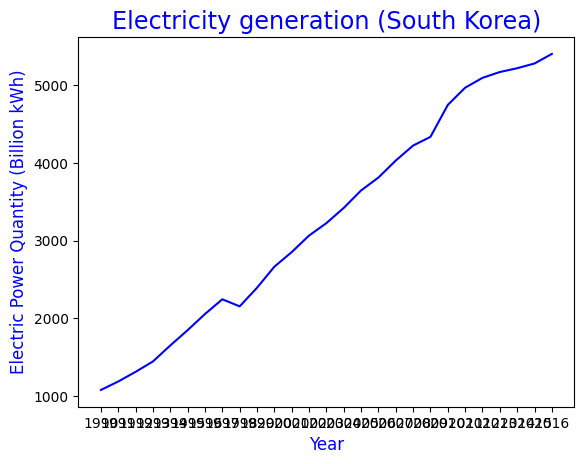

In [119]:
# 시각화
# 남한 발전전력량 합계
south=south.T
xdata=south.index
ydata=south['합계']
print(xdata.shape,ydata.shape)
plt.plot(xdata,ydata,'b')
plt.title('Electricity generation (South Korea)', fontdict={'color':'b','size':'xx-large'})
plt.xlabel('Year',fontdict={'color':'b','size':'large'})
plt.ylabel('Electric Power Quantity (Billion kWh)',fontdict={'color':'b','size':'large'})
plt.show()

(27,) (27,)


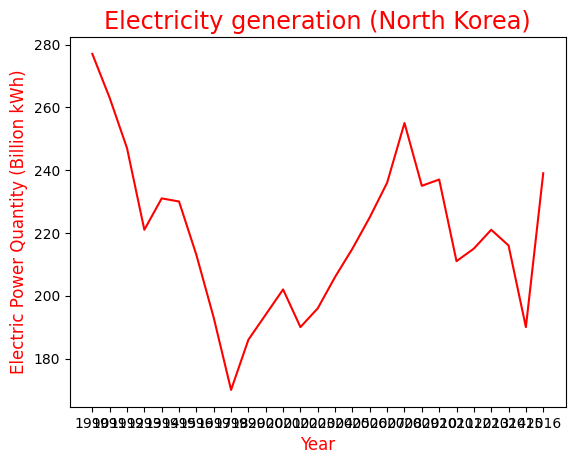

In [120]:
# 북한 발전전력량 합계
north=north.T
xdata=north.index
ydata=north['합계']
print(xdata.shape,ydata.shape)
plt.plot(xdata,ydata,'r')
plt.title('Electricity generation (North Korea)', fontdict={'color':'r','size':'xx-large'})
plt.xlabel('Year',fontdict={'color':'r','size':'large'})
plt.ylabel('Electric Power Quantity (Billion kWh)',fontdict={'color':'r','size':'large'})
plt.show()

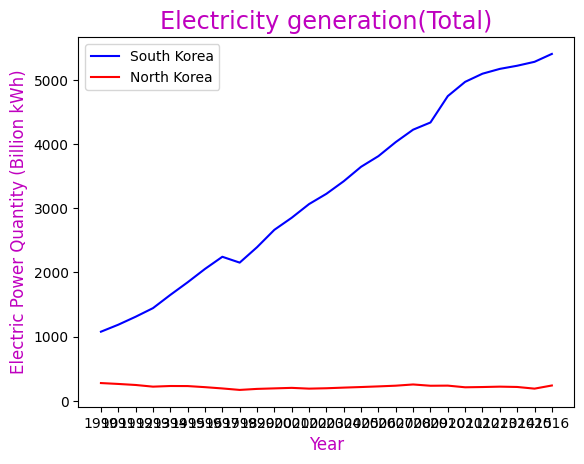

In [121]:
# 비교
xdata1=south.index
ydata1=south['합계']
xdata2=north.index
ydata2=north['합계']
plt.plot(xdata1,ydata1,'b',label='South Korea')
plt.plot(xdata2,ydata2,'r',label='North Korea')
plt.legend()
plt.title('Electricity generation(Total)', fontdict={'color':'m','size':'xx-large'})
plt.xlabel('Year',fontdict={'color':'m','size':'large'})
plt.ylabel('Electric Power Quantity (Billion kWh)',fontdict={'color':'m','size':'large'})
plt.show()

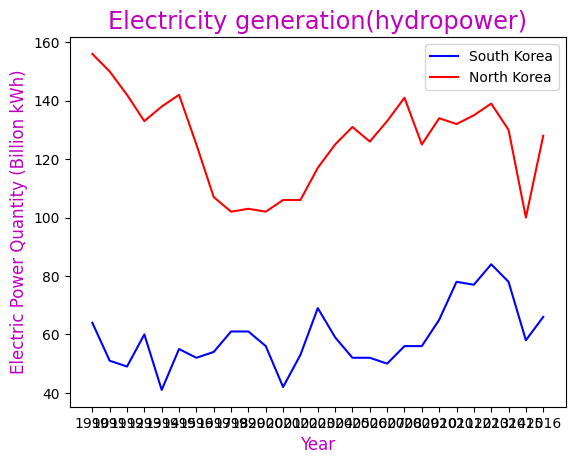

In [122]:
# 다른 데이터도 비교
# 수력
xdata1=south.index
ydata1=south['수력']
xdata2=north.index
ydata2=north['수력']
plt.plot(xdata1,ydata1,'b',label='South Korea')
plt.plot(xdata2,ydata2,'r',label='North Korea')
plt.legend()
plt.title('Electricity generation(hydropower)', fontdict={'color':'m','size':'xx-large'})
plt.xlabel('Year',fontdict={'color':'m','size':'large'})
plt.ylabel('Electric Power Quantity (Billion kWh)',fontdict={'color':'m','size':'large'})
plt.show()

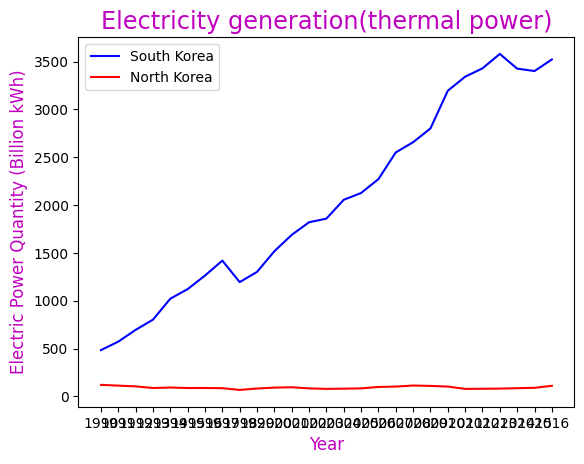

In [123]:
# 화력
xdata1=south.index
ydata1=south['화력']
xdata2=north.index
ydata2=north['화력']
plt.plot(xdata1,ydata1,'b',label='South Korea')
plt.plot(xdata2,ydata2,'r',label='North Korea')
plt.legend()
plt.title('Electricity generation(thermal power)', fontdict={'color':'m','size':'xx-large'})
plt.xlabel('Year',fontdict={'color':'m','size':'large'})
plt.ylabel('Electric Power Quantity (Billion kWh)',fontdict={'color':'m','size':'large'})
plt.show()

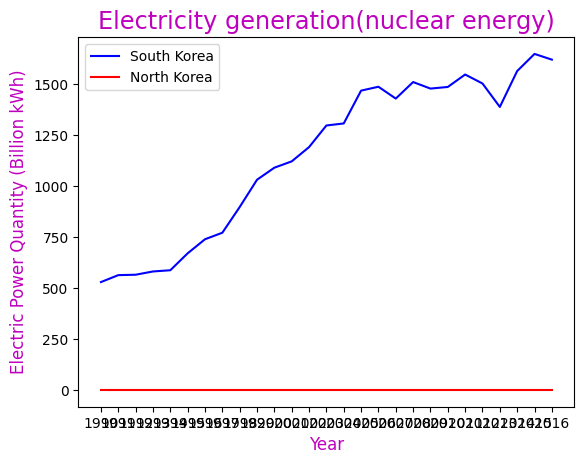

In [124]:
# 원자력
xdata1=south.index
ydata1=south['원자력']
xdata2=north.index
ydata2=north['원자력']
plt.plot(xdata1,ydata1,'b',label='South Korea')
plt.plot(xdata2,ydata2,'r',label='North Korea')
plt.legend()
plt.title('Electricity generation(nuclear energy)', fontdict={'color':'m','size':'xx-large'})
plt.xlabel('Year',fontdict={'color':'m','size':'large'})
plt.ylabel('Electric Power Quantity (Billion kWh)',fontdict={'color':'m','size':'large'})
plt.show()

In [ ]:
# 결론
# 1. 수력제외 모든 곳에서 남한의 발전 전력량이 북한보다 더 높음. 
# 2. 발전전력총량에서 남북한의 차이가 벌어지고 있으며, 화력 발전과 원자력 발전 부분에서 차이가 벌어지고 있다.